<h2>Import bibliotek</h2>

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

<h2>Zadanie 6.</h2>

<h3>$y' = \alpha t^{\alpha-1}, \alpha > 0$</h3>

<h3>$y(0) = 0$</h3>

<h3>Solution: $y(t) = t^\alpha$</h3>

In [13]:
# define derivative
def dy_dt(alpha, t):
    return alpha * t**(alpha-1)

# define t0, t_end and y0
t0 = 0
t_end = 5
y0 = 0

# define solution
def y(alpha, t):
    return t**alpha

Definicja alf i h

In [3]:
# define alphas
alphas = [2.5, 1.5, 1.1]
# define hs
hs = [0.2, 0.1, 0.05]

Metoda Eulera

In [4]:
# Euler method function
def euler(t0, t_end, y0, h, f):
    tn = t0
    yn = y0
    ts = [t0]
    ys = [y0]
    while tn < t_end:
        yn += h*f(tn)
        tn += h
        ts.append(tn)
        ys.append(yn)
    return ts, ys

Funkcja rysująca otrzymany wynik

In [5]:
def plot_result(alpha, x_start, x_end, hs, results):
    # define xs for function plot
    xs = np.linspace(x_start, x_end, 500)
    # set figsize
    plt.figure(figsize=(12,8))
    # add title and labels
    plt.title(rf"Euler method for $y' = {alpha}t^{{{alpha-1}}}$ and $y(0) = 0$")
    plt.xlabel("x")
    plt.ylabel("y")
    # plot function and euler method results
    plt.plot(xs, y(alpha, xs), label=rf"Proper result: $t^{{{alpha}}}$")
    for i in range(len(hs)):
        plt.plot(results[i][0], results[i][1], label=f"Euler method for h={hs[i]}")
    # show with legend
    plt.legend()
    plt.grid()
    plt.show()

<h4>$\alpha_1 = 2.5$</h4>

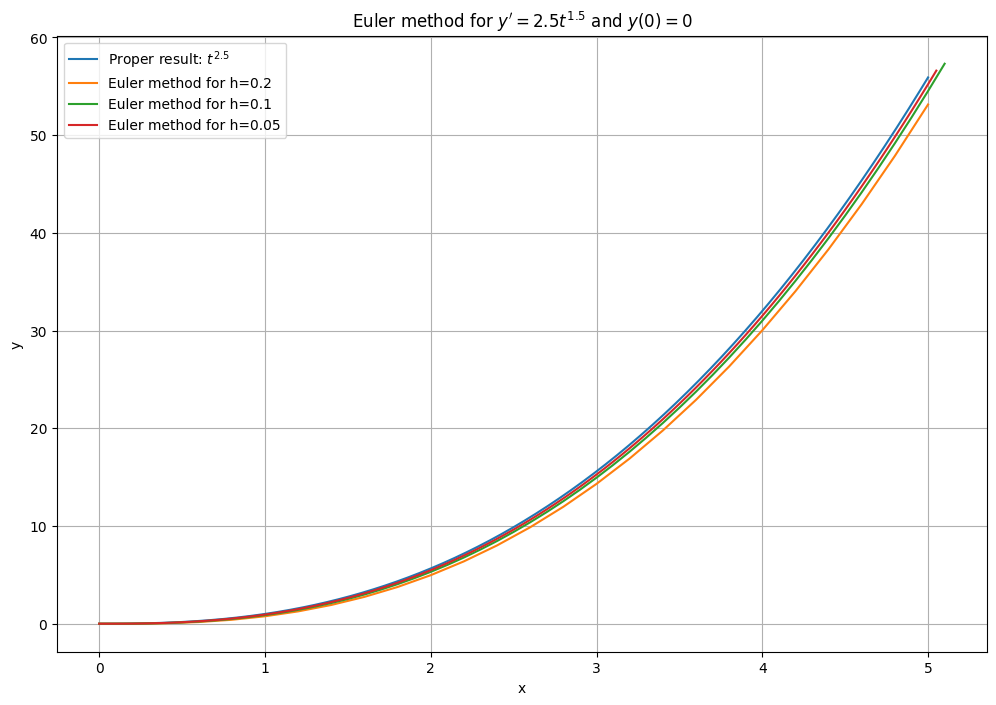

In [16]:
# get results for all hs
results1 = [euler(t0, t_end, y0, h, lambda t: dy_dt(alphas[0], t)) for h in hs]
# plot results
plot_result(alphas[0], t0, t_end, hs, results1)